In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist     import plots, MCSamples 
from   astropy.table import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  =  False

In [5]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold.fits'

In [6]:
gold = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'FALSE'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0)])

##  VMAX

In [10]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
vmax  = Table.read(fpath)
vmax

DEC,MCOLOR_0P0,ZMIN,ZMAX,MALL_0P0,FIELD,FILLFACTOR_VMAX,FILLFACTOR,RA,IN_D8LUMFN,WEIGHT_STEPWISE,ZSURV,VMAX,VZ
deg,mag,,,mag,,,,deg,,,,,
float64,float64,float64,float64,float64,bytes3,float64,float64,float64,int64,float64,float32,float64,float64
2.42943373,-18.28383923953233,0.036729998886585236,0.13951500174464584,-18.412949724847653,G9,0.624288538250441,0.8127160046085126,139.23047512,0,2.5324446308643034,0.11227,753859.1474602104,628625.4377848413
1.81225715,-19.948851030455135,0.036729998886585236,0.2706100046634674,-20.208060991154216,G9,0.7797192364390116,1.0,138.86944953,0,6.771929604808127,0.2254,6424956.386552604,4894603.446660215
-2.1572505,-21.13519463679464,0.036729998886585236,0.2706100046634674,-21.113859631034448,G12,0.7797192364390116,0.9235727057534775,176.25074554,0,2.7879565542227054,0.1255,6424956.386552604,880228.4288816366
-0.86410375,-19.513802704555964,0.036729998886585236,0.20225379188420323,-19.487879407746767,G15,0.7287106967347928,1.0,220.52254643,0,3.8510701868189137,0.15249,2610878.7742084656,1571184.8076225782
-0.95353519,-20.75306876756291,0.036729998886585236,0.2706100046634674,-20.735181361511753,G12,0.7797192364390116,1.0,177.58136829,0,2.310720721840845,0.10522,6424956.386552604,515559.4551880245
0.96169929,-18.095932068056264,0.036729998886585236,0.12298310172853909,-18.194280052310624,G15,0.5851567325943148,1.0,216.57421687,0,1.923196749417998,0.08552,484643.0275549797,269199.9442781308
-0.49210816,-19.215623414672855,0.036729998886585236,0.21694002031558093,-19.39528787747765,G9,0.7458250316399908,1.0,136.61920934,0,3.8510701868189137,0.15623,3270659.631652062,1687458.8111005237
-1.7624878,-20.73918807667125,0.036729998886585236,0.2706100046634674,-20.69536718886722,G15,0.7797192364390116,0.834164619761692,221.42715873,0,10.03096547575655,0.25777,6424956.386552604,7179212.017488108


##  LUMFN

In [18]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
lumfn = Table.read(fpath)
lumfn[lumfn['MID_M'] < -20.5]

MEDIAN_M,MEAN_M,MID_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64
-25.4,-25.4,-25.4,0.0,0.0,0.0,0.0,0.0,0.0
-25.48584913809907,-25.48584913809907,-25.200000000000003,6.067895169459533e-07,6.067895169459533e-07,8.158791962347847e-07,8.158791962347847e-07,1.0,0.7437247079546051
-25.0,-25.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0
-24.800000000000004,-24.800000000000004,-24.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0
-24.6,-24.6,-24.6,0.0,0.0,0.0,0.0,0.0,0.0
-24.400000000000006,-24.400000000000006,-24.400000000000006,0.0,0.0,0.0,0.0,0.0,0.0
-24.200000000000003,-24.200000000000003,-24.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-24.000000000000007,-24.000000000000007,-24.000000000000007,0.0,0.0,0.0,0.0,0.0,0.0
-23.800000000000004,-23.800000000000004,-23.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
## HACK
## TODO: note that offset should be re-added if desired.
offset = 0.12

## TODO: Rename
gama_lf = lumfn

/tmp/ipykernel_146927/2082379129.py:13: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MID_M'], 0.08 + np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=2.)


Text(0.5, 1.0, 'GAMA')

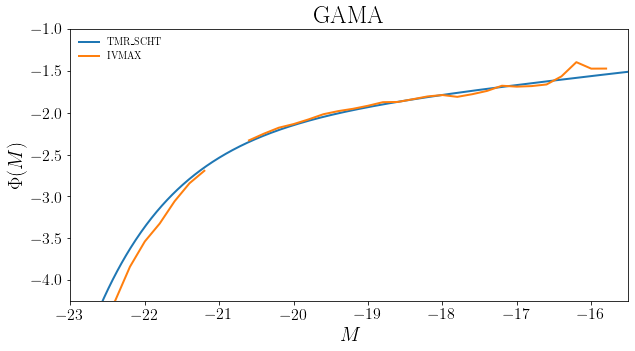

In [13]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

fig, ax = plt.subplots(1,1,figsize=(10, 5))

pl.sca(ax)

pl.plot(Ms, np.log10(sc), label='TMR_SCHT', lw=2.)

# pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N'] / 0.77), label='RAW', lw=2.)
# pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=2.)
# pl.plot(gama_lf['MEAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=2.)
pl.plot(gama_lf['MID_M'], 0.08 + np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=2.)

# offset = 1.15
# pl.plot(lumfn_step['Ms'], np.log10(lumfn_step['PHI_STEP'])-offset, label='STEPWISE', lw=2.)

# pl.scatter(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], s=0.5)
# pl.plot(lumfn_TMR['Ms'], lumfn_TMR['PHI_STEP'], label='TMR_SWML', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

In [12]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
gold  = Table.read(fpath)
gold

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32
86187,587722983890026653,185.64764412,0.45825774,17.885168,0.23773,4,G12_Y1_IN1_366,6,20.97136,19.13244,17.69423,17.180195,16.8645,0.23773,840.5726708609474,39.62287632944614,G12,0,0,-675.8062612682004,-66.83079688776589,5.431651350640607,676.2613794170416,62.116879849571745,4.6905186350961925,1.4382114,17.885168
617429,588848900463329480,211.51215914,0.33337858,16.491335,0.05383,4,G15_Y6_072_126,6,18.441204,17.068653,16.389126,15.991108,15.69622,0.05383,168.3225606128227,36.13071164621924,G15,0,0,-136.1675749443299,-83.48335106299008,0.9293608415316806,136.7473174971628,82.53184613359454,0.779495741336187,0.6795273,16.491335
594128,588848899929800874,219.05986017,-0.07440745,17.661882,0.13694,5,344534744807008256,6,19.502266,18.28102,17.649033,17.278406,17.08318,0.13694,454.3391400668327,38.286900758504636,G15,0,0,-310.2965986762804,-251.81045450990524,-0.5189628516176182,312.04413432684754,249.64068275010177,-0.8609420807934335,0.6319866,17.661882
619784,588848900467655041,221.331891,0.28400507,19.199787,0.2063,4,G15_Y2_014_259,6,22.054535,20.266598,19.106667,18.666481,18.32868,0.2063,715.7382006779324,39.27377098589429,G15,0,0,-445.5266613190083,-391.84432420106833,2.9410373795726867,448.2510540490064,388.72820986399864,2.449786808740405,1.1599312,19.199787
517646,588010358528868746,133.10434664,2.46904323,19.02159,0.21168,4,G09_Y1_CX2_265,6,22.315638,20.25712,18.987331,18.496666,18.107693,0.21168,736.8315164616245,39.33684096822303,G9,0,0,-415.15174372520573,443.57337261322016,26.197021488563923,412.0771454194852,-446.45737786817364,25.745429000529725,1.2697887,19.02159
250504,587726015084167756,214.80095093,2.0113576,19.314877,0.08258,4,G15_Y6_083_154,6,21.896044,19.971685,19.291718,18.874441,18.496765,0.08258,263.76840050867764,37.10611382893427,G15,0,0,-199.94575651953147,-138.97084242037815,8.551459291074071,200.91916902577134,137.57327318029633,8.331270830872633,0.6799679,19.314877
105538,587722984438628396,212.43262578,0.92333403,17.884026,0.20102,5,340177655959676928,6,21.931866,18.96789,17.763554,17.288898,17.004675,0.20102,695.1487465240222,39.21038871994787,G15,0,0,-488.4557448533853,-310.3737413663091,9.327063108802347,490.61798540477486,306.96026977875385,8.789385129036933,1.2043362,17.884026
574914,588848899894149537,137.75408238,-0.07159713,19.748035,0.22326,4,G09_Y3_010_235,5,23.506832,20.890038,19.711256,19.360645,18.972797,0.22326,782.6207677913833,39.46775684124222,G9,0,0,-473.609123961879,430.1346558728962,-0.7994760275212474,470.59718916445354,-433.4266020851874,-1.3152186723953165,1.1787815,19.748035


##  Cobaya

In [13]:
# root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [20]:
# dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [21]:
# samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [22]:
# samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [18]:
# tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [24]:
# g = plots.get_subplot_plotter()

In [17]:
# g.triangle_plot([samples], filled=True)        

# Done.